In [81]:
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp 
os.getcwd()
os.chdir('C:\\Users\\swathi veldanda\\Downloads')

In [82]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn import metrics


In [83]:
data=pd.read_csv('USA_media_cost.csv')

In [84]:
data.head()

,Unnamed: 0,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,...,costliving_diffNationalIndex_EXTERNAL,Basket_Cost_EXTERNAL,INDEX_Basket_citynational_EXTERNAL,Basket_diffNationalIndex_EXTERNAL,INDEX_Basket_citytoALL_EXTERNAL,Basket_diff_overall_EXTERNAL,Recoded_YearlyIncome_Midpt,income_class_USA_ONLY_noTax,income_class_within_Country,Segment K-means
0,0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,...,-0.279715,5.04,0.626087,-0.373913,1.086207,0.086207,20000,Low,Low,1
1,1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,...,-0.279715,5.04,0.626087,-0.373913,1.086207,0.086207,60000,Middle,Middle,2
2,2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,...,-0.279715,5.04,0.626087,-0.373913,1.086207,0.086207,20000,Low,Low,1
3,3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,...,-0.279715,5.04,0.626087,-0.373913,1.086207,0.086207,40000,Low,Middle,1
4,4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,...,-0.279715,5.04,0.626087,-0.373913,1.086207,0.086207,40000,Low,Middle,1


In [85]:
#profile = pp.ProfileReport(data) 

#profile.to_file("output.html")

In [86]:
#profile


In [87]:
data.shape

(38892, 62)

In [88]:
#data.info()

In [89]:
data = data.drop_duplicates()

In [90]:
data.describe()

,Unnamed: 0,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,...,AVG_Market_Bask_Cost_FULL_dataset_EXTERNAL,INDEX_ratio_living_citynational_EXTERNAL,costliving_diffNationalIndex_EXTERNAL,Basket_Cost_EXTERNAL,INDEX_Basket_citynational_EXTERNAL,Basket_diffNationalIndex_EXTERNAL,INDEX_Basket_citytoALL_EXTERNAL,Basket_diff_overall_EXTERNAL,Recoded_YearlyIncome_Midpt,Segment K-means
count,38892.000000,38892.000000,38892.000000,38892.000000,38892.000000,38892.000000,38892.000000,38892.000000,38892.000000,38892.000000,...,3.889200e+04,38892.000000,38892.000000,38892.000000,38892.000000,38892.000000,38892.000000,38892.000000,38892.000000,38892.000000
mean,29999.168801,6.515973,2.606900,3.080556,2.504577,2.208269,0.818343,2.208269,2.116393,13.811105,...,4.640000e+00,0.863679,-0.136321,7.207939,0.895396,-0.104604,1.553435,0.553435,58309.163838,1.211535
std,17481.646448,3.460749,1.447546,0.832546,1.482338,1.133012,1.293176,1.133012,0.932316,4.623929,...,3.433742e-12,0.110113,0.110113,1.570241,0.195061,0.195061,0.338414,0.338414,36599.993907,0.642585
min,0.000000,0.510000,0.170500,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000,6.000000,...,4.640000e+00,0.720285,-0.279715,5.040000,0.626087,-0.373913,1.086207,0.086207,20000.000000,0.000000
25%,15089.750000,3.780000,1.486800,3.000000,1.000000,1.000000,0.000000,1.000000,1.410000,9.700000,...,4.640000e+00,0.726307,-0.273693,5.910000,0.734161,-0.265839,1.273707,0.273707,40000.000000,1.000000
50%,29991.500000,5.910000,2.371550,3.000000,2.000000,2.000000,0.000000,2.000000,2.130000,13.600000,...,4.640000e+00,0.859905,-0.140095,7.570000,0.940373,-0.059627,1.631466,0.631466,40000.000000,1.000000
75%,45131.250000,8.650000,3.475275,4.000000,4.000000,3.000000,1.000000,3.000000,2.800000,17.700000,...,4.640000e+00,0.981458,-0.018542,8.010000,0.995031,-0.004969,1.726293,0.726293,80000.000000,2.000000
max,60425.000000,19.900000,9.726500,6.000000,5.000000,4.000000,5.000000,4.000000,3.980000,21.900000,...,4.640000e+00,1.151823,0.151823,10.340000,1.284472,0.284472,2.228448,1.228448,160000.000000,2.000000


In [91]:

data.columns

Index(['Unnamed: 0', 'food_category', 'food_department', 'food_family',
       'store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'promotion_name', 'sales_country',
       'marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)',
       'avg. yearly_income', 'num_children_at_home',
       'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight',
       'net_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft',
       'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar',
       'prepared_food', 'florist', 'media_type', 'cost',
       'AnnualMedianIncome_withoutTax', 'AnnualMedianIncome_AfterTax',
       'population_city_EXTERNAL', 'cst_living_fam_4_mthly_city_EXTERNAL',
       'AVG_cst_living_fam_4_mthly_national_EXTERNAL', 'milk_1L_1qt_EXTERNAL',
       'bread_0

In [92]:
data1=data.drop(columns=['Unnamed: 0','food_category', 'food_family',
       'store_sales(in millions)', 'store_cost(in millions)','education','avg_cars_at home(approx).1','avg. yearly_income',
           'num_children_at_home','SRP', 'gross_weight','store_city', 'store_state','meat_sqft','salad_bar',
            'marital_status','AnnualMedianIncome_withoutTax','AVG_cst_living_fam_4_mthly_national_EXTERNAL',
            'AVG_Market_Bask_Cost_FULL_dataset_EXTERNAL','INDEX_ratio_living_citynational_EXTERNAL',
            'Basket_Cost_EXTERNAL','INDEX_Basket_citynational_EXTERNAL','Basket_diffNationalIndex_EXTERNAL',
            'INDEX_Basket_citytoALL_EXTERNAL','Basket_diff_overall_EXTERNAL','income_class_USA_ONLY_noTax'])
data1.columns

Index(['food_department', 'unit_sales(in millions)', 'promotion_name',
       'sales_country', 'gender', 'total_children', 'member_card',
       'occupation', 'houseowner', 'avg_cars_at home(approx)', 'brand_name',
       'net_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'store_type', 'store_sqft', 'grocery_sqft', 'frozen_sqft', 'coffee_bar',
       'video_store', 'prepared_food', 'florist', 'media_type', 'cost',
       'AnnualMedianIncome_AfterTax', 'population_city_EXTERNAL',
       'cst_living_fam_4_mthly_city_EXTERNAL', 'milk_1L_1qt_EXTERNAL',
       'bread_0.5kg_1.1lb_EXTERNAL', 'Egg_12_EXTERNAL',
       'AVG_basket_cost_national_EXTERNAL',
       'costliving_diffNationalIndex_EXTERNAL', 'Recoded_YearlyIncome_Midpt',
       'income_class_within_Country', 'Segment K-means'],
      dtype='object')

In [93]:
data1.head()


,food_department,unit_sales(in millions),promotion_name,sales_country,gender,total_children,member_card,occupation,houseowner,avg_cars_at home(approx),...,population_city_EXTERNAL,cst_living_fam_4_mthly_city_EXTERNAL,milk_1L_1qt_EXTERNAL,bread_0.5kg_1.1lb_EXTERNAL,Egg_12_EXTERNAL,AVG_basket_cost_national_EXTERNAL,costliving_diffNationalIndex_EXTERNAL,Recoded_YearlyIncome_Midpt,income_class_within_Country,Segment K-means
0,Frozen Foods,4.0,Bag Stuffers,USA,F,1.0,Normal,Skilled Manual,Y,1.0,...,176000,4545,0.8,2.54,1.7,8.05,-0.279715,20000,Low,1
1,Frozen Foods,3.0,Cash Register Lottery,USA,M,0.0,Silver,Professional,Y,4.0,...,176000,4545,0.8,2.54,1.7,8.05,-0.279715,60000,Middle,2
2,Frozen Foods,2.0,High Roller Savings,USA,F,4.0,Normal,Manual,N,1.0,...,176000,4545,0.8,2.54,1.7,8.05,-0.279715,20000,Low,1
3,Frozen Foods,2.0,Cash Register Lottery,USA,F,2.0,Bronze,Manual,Y,2.0,...,176000,4545,0.8,2.54,1.7,8.05,-0.279715,40000,Middle,1
4,Frozen Foods,3.0,Double Down Sale,USA,M,0.0,Bronze,Skilled Manual,N,2.0,...,176000,4545,0.8,2.54,1.7,8.05,-0.279715,40000,Middle,1


In [94]:
encoding_dict={'M':1,'F':0}
data1['gender']=data1['gender'].map(encoding_dict)
encoding_dict1={'Y':1,'N':0}
data1['houseowner']=data1['houseowner'].map(encoding_dict1)

In [95]:
lb=LabelEncoder()
scale_cols=['food_department','promotion_name','sales_country',
            'member_card','occupation','store_type','media_type','brand_name','income_class_within_Country',]
data1[scale_cols]=data1[scale_cols].apply(lb.fit_transform)

In [96]:
data1.head()

,food_department,unit_sales(in millions),promotion_name,sales_country,gender,total_children,member_card,occupation,houseowner,avg_cars_at home(approx),...,population_city_EXTERNAL,cst_living_fam_4_mthly_city_EXTERNAL,milk_1L_1qt_EXTERNAL,bread_0.5kg_1.1lb_EXTERNAL,Egg_12_EXTERNAL,AVG_basket_cost_national_EXTERNAL,costliving_diffNationalIndex_EXTERNAL,Recoded_YearlyIncome_Midpt,income_class_within_Country,Segment K-means
0,12,4.0,0,0,0,1.0,2,4,1,1.0,...,176000,4545,0.8,2.54,1.7,8.05,-0.279715,20000,1,1
1,12,3.0,6,0,1,0.0,3,3,1,4.0,...,176000,4545,0.8,2.54,1.7,8.05,-0.279715,60000,2,2
2,12,2.0,18,0,0,4.0,2,2,0,1.0,...,176000,4545,0.8,2.54,1.7,8.05,-0.279715,20000,1,1
3,12,2.0,6,0,0,2.0,0,2,1,2.0,...,176000,4545,0.8,2.54,1.7,8.05,-0.279715,40000,2,1
4,12,3.0,11,0,1,0.0,0,4,0,2.0,...,176000,4545,0.8,2.54,1.7,8.05,-0.279715,40000,2,1


In [97]:
x=data1.drop('cost',axis=1)
y=data1['cost']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

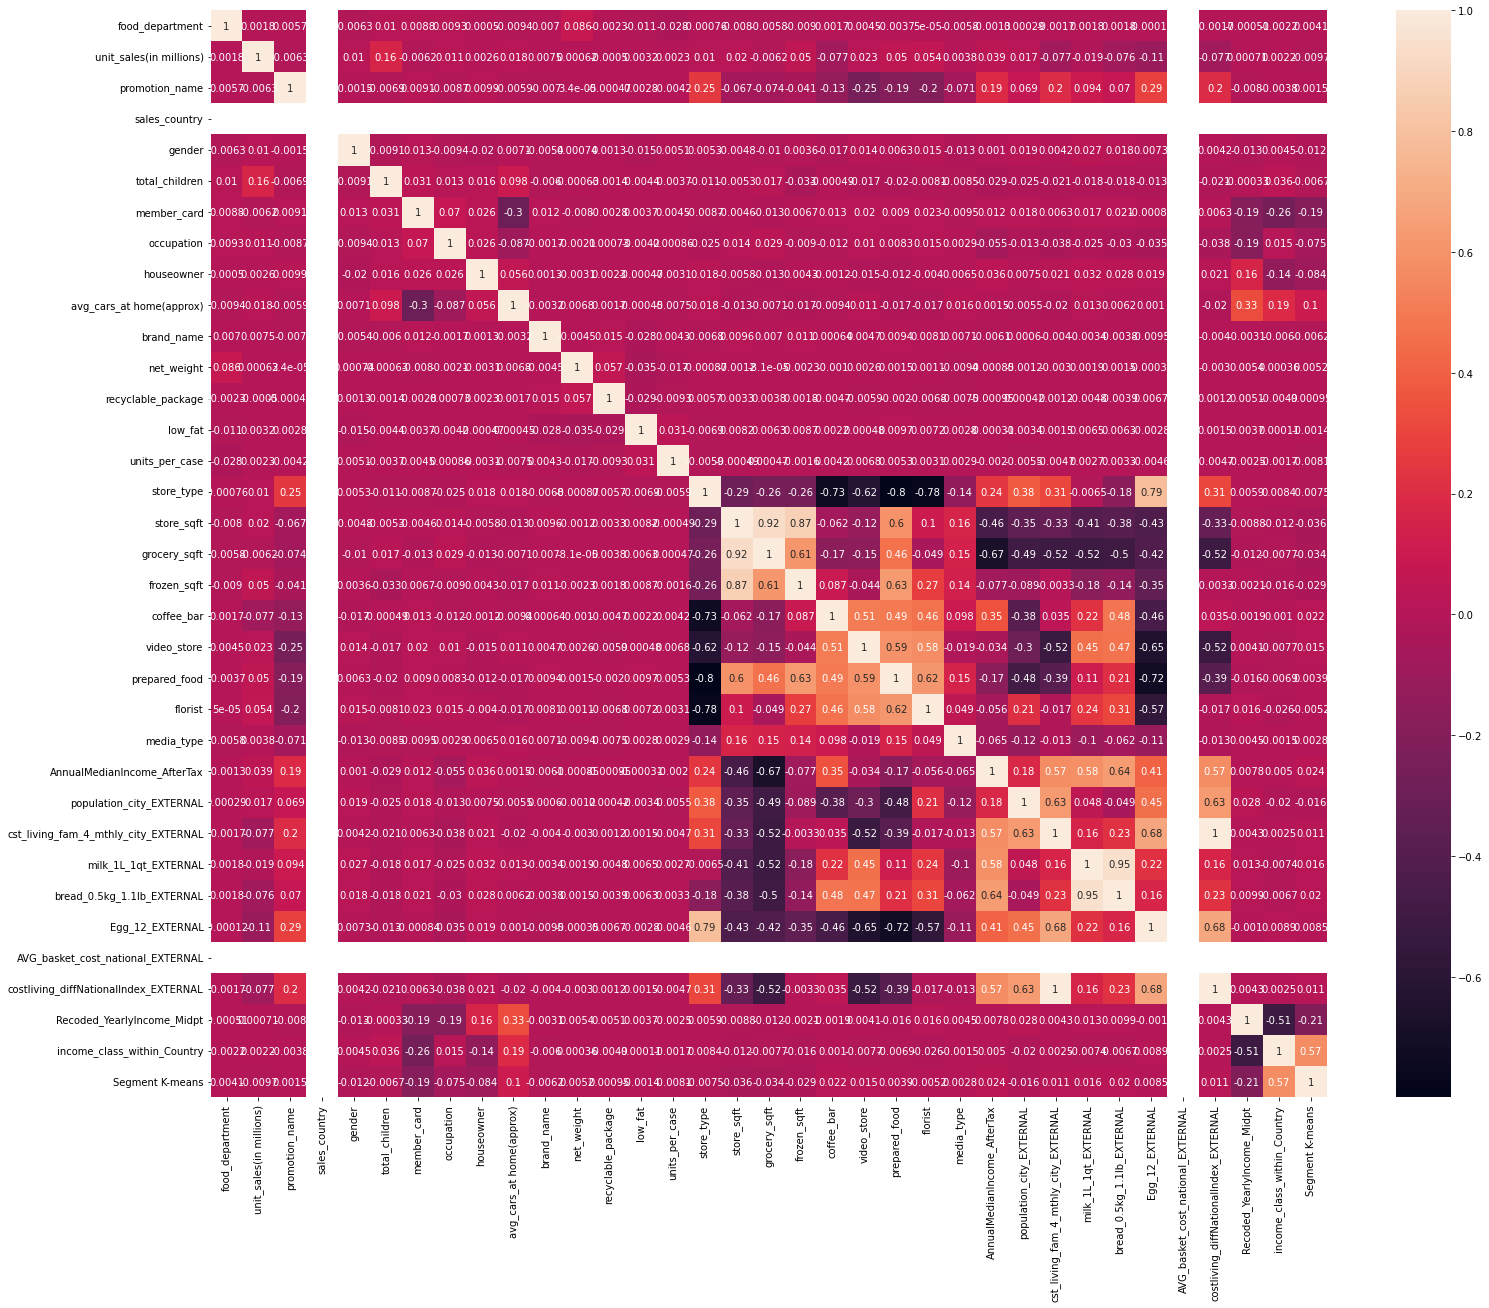

In [98]:
fig=plt.figure(figsize=(25,20))
sns.heatmap(x.corr(),annot=True)
plt.show();

In [99]:
x.head()

,food_department,unit_sales(in millions),promotion_name,sales_country,gender,total_children,member_card,occupation,houseowner,avg_cars_at home(approx),...,population_city_EXTERNAL,cst_living_fam_4_mthly_city_EXTERNAL,milk_1L_1qt_EXTERNAL,bread_0.5kg_1.1lb_EXTERNAL,Egg_12_EXTERNAL,AVG_basket_cost_national_EXTERNAL,costliving_diffNationalIndex_EXTERNAL,Recoded_YearlyIncome_Midpt,income_class_within_Country,Segment K-means
0,12,4.0,0,0,0,1.0,2,4,1,1.0,...,176000,4545,0.8,2.54,1.7,8.05,-0.279715,20000,1,1
1,12,3.0,6,0,1,0.0,3,3,1,4.0,...,176000,4545,0.8,2.54,1.7,8.05,-0.279715,60000,2,2
2,12,2.0,18,0,0,4.0,2,2,0,1.0,...,176000,4545,0.8,2.54,1.7,8.05,-0.279715,20000,1,1
3,12,2.0,6,0,0,2.0,0,2,1,2.0,...,176000,4545,0.8,2.54,1.7,8.05,-0.279715,40000,2,1
4,12,3.0,11,0,1,0.0,0,4,0,2.0,...,176000,4545,0.8,2.54,1.7,8.05,-0.279715,40000,2,1


In [100]:
model = DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [101]:
y_pred=model.predict(x_test)

In [102]:
print('r2 score: ', r2_score(y_test, y_pred))


r2 score:  0.9978659225890899


In [103]:
model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('r2 score: ', r2_score(y_test, y_pred))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


r2 score:  0.9985089522365654
Mean Absolute Error: 0.09692613129941746
Mean Squared Error: 1.380224909762602
Root Mean Squared Error: 1.1748297364991245


In [104]:
param_grid = {"n_estimators": list((range(20, 200))), "max_depth": list((range(3, 12))),
    "min_samples_split": list((range(2, 5))),"min_samples_leaf": list((range(1, 5))),
    "ccp_alpha": [0, 0.001, 0.01, 0.1],
}
model_1= RandomForestRegressor(random_state=123)
model_param = RandomizedSearchCV(estimator=model_1,param_distributions=param_grid,cv=3, n_iter=10, verbose=2, 
                                 scoring="neg_mean_absolute_error",random_state=123)
model_param.fit(x_train, y_train)
print("Best parameters found: ", model_param.best_params_)
print("Best performance: ", model_param.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ccp_alpha=0, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=85; total time=   3.5s
[CV] END ccp_alpha=0, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=85; total time=   3.5s
[CV] END ccp_alpha=0, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=85; total time=   3.6s
[CV] END ccp_alpha=0.001, max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=150; total time=   4.1s
[CV] END ccp_alpha=0.001, max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=150; total time=   4.0s
[CV] END ccp_alpha=0.001, max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=150; total time=   4.0s
[CV] END ccp_alpha=0, max_depth=11, min_samples_leaf=1, min_samples_split=4, n_estimators=110; total time=   4.7s
[CV] END ccp_alpha=0, max_depth=11, min_samples_leaf=1, min_samples_split=4, n_estimators=110; total time=   4.8s
[CV] END ccp_alpha=0,

In [105]:
params = {
    "n_estimators": 110,  
    "max_depth": 11, 
    "min_samples_split": 4,  
    "min_samples_leaf": 1,  
    "ccp_alpha": 0, 
    "random_state": 123,
}
model_tuned = RandomForestRegressor(**params)
model_tuned = model_tuned.fit(x_train, y_train)
y_pred_tuned = model_tuned.predict(x_test)

In [106]:
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred_tuned))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred_tuned))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred_tuned)))

Mean Absolute Error: 5.36984747728351
Mean Squared Error: 92.11170741181105
Root Mean Squared Error: 9.597484431444057


In [107]:
importances_sorted = pd.Series(
    data=model.feature_importances_, index=x_train.columns
).sort_values()
importances_sorted


AVG_basket_cost_national_EXTERNAL        0.000000
sales_country                            0.000000
recyclable_package                       0.000034
low_fat                                  0.000050
Segment K-means                          0.000067
houseowner                               0.000080
gender                                   0.000091
income_class_within_Country              0.000122
units_per_case                           0.000153
food_department                          0.000159
unit_sales(in millions)                  0.000165
Recoded_YearlyIncome_Midpt               0.000191
brand_name                               0.000200
member_card                              0.000214
net_weight                               0.000245
occupation                               0.000310
avg_cars_at home(approx)                 0.000338
total_children                           0.000556
video_store                              0.000762
prepared_food                            0.003316


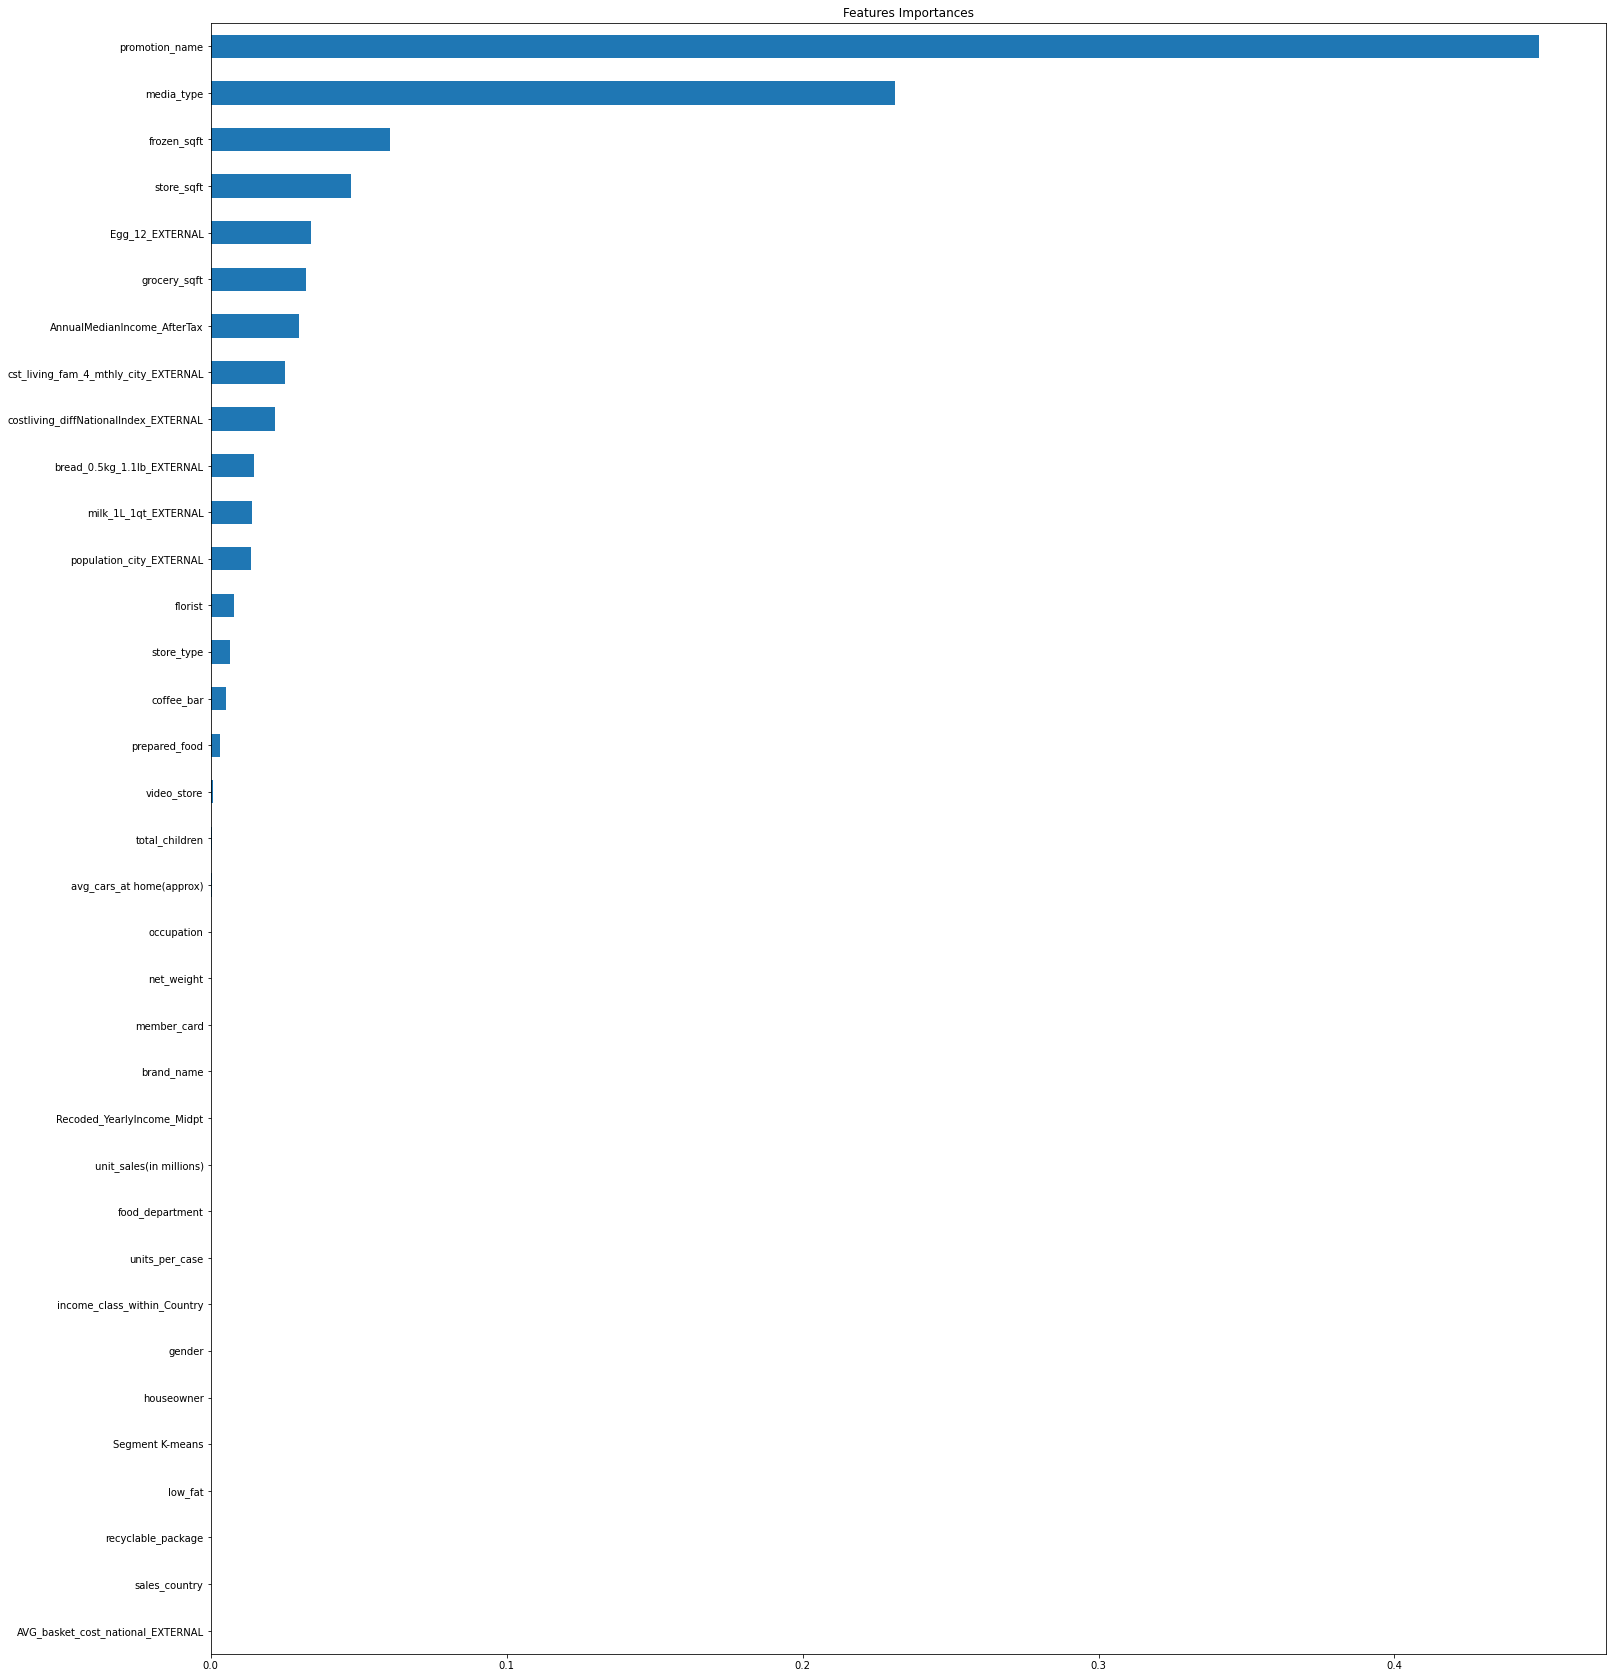

In [108]:
# Plot a horizontal barplot of importances_sorted
%matplotlib inline
fig=plt.figure(figsize=(25,30))
importances_sorted.plot(kind="barh")
plt.title("Features Importances")
plt.show()

In [109]:
data2=data1.drop(columns=['food_department', 'unit_sales(in millions)','sales_country', 'gender', 'member_card',
       'occupation', 'houseowner', 'avg_cars_at home(approx)', 'brand_name',
       'net_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'population_city_EXTERNAL','AVG_basket_cost_national_EXTERNAL',
       'costliving_diffNationalIndex_EXTERNAL', 'Recoded_YearlyIncome_Midpt',
       'income_class_within_Country', 'Segment K-means'])

In [110]:
data2.head()

,promotion_name,total_children,store_type,store_sqft,grocery_sqft,frozen_sqft,coffee_bar,video_store,prepared_food,florist,media_type,cost,AnnualMedianIncome_AfterTax,cst_living_fam_4_mthly_city_EXTERNAL,milk_1L_1qt_EXTERNAL,bread_0.5kg_1.1lb_EXTERNAL,Egg_12_EXTERNAL
0,0,1.0,0,27694.0,18670.0,5415.0,1.0,1.0,1.0,1.0,3,126.62,40680,4545,0.8,2.54,1.7
1,6,0.0,0,27694.0,18670.0,5415.0,1.0,1.0,1.0,1.0,3,59.86,40680,4545,0.8,2.54,1.7
2,18,4.0,0,27694.0,18670.0,5415.0,1.0,1.0,1.0,1.0,3,84.16,40680,4545,0.8,2.54,1.7
3,6,2.0,0,27694.0,18670.0,5415.0,1.0,1.0,1.0,1.0,5,95.78,40680,4545,0.8,2.54,1.7
4,11,0.0,0,27694.0,18670.0,5415.0,1.0,1.0,1.0,1.0,7,50.79,40680,4545,0.8,2.54,1.7


In [111]:
x1=data2.drop('cost',axis=1)
y1=data2['cost']
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3)

In [112]:
data2.columns

Index(['promotion_name', 'total_children', 'store_type', 'store_sqft',
       'grocery_sqft', 'frozen_sqft', 'coffee_bar', 'video_store',
       'prepared_food', 'florist', 'media_type', 'cost',
       'AnnualMedianIncome_AfterTax', 'cst_living_fam_4_mthly_city_EXTERNAL',
       'milk_1L_1qt_EXTERNAL', 'bread_0.5kg_1.1lb_EXTERNAL',
       'Egg_12_EXTERNAL'],
      dtype='object')

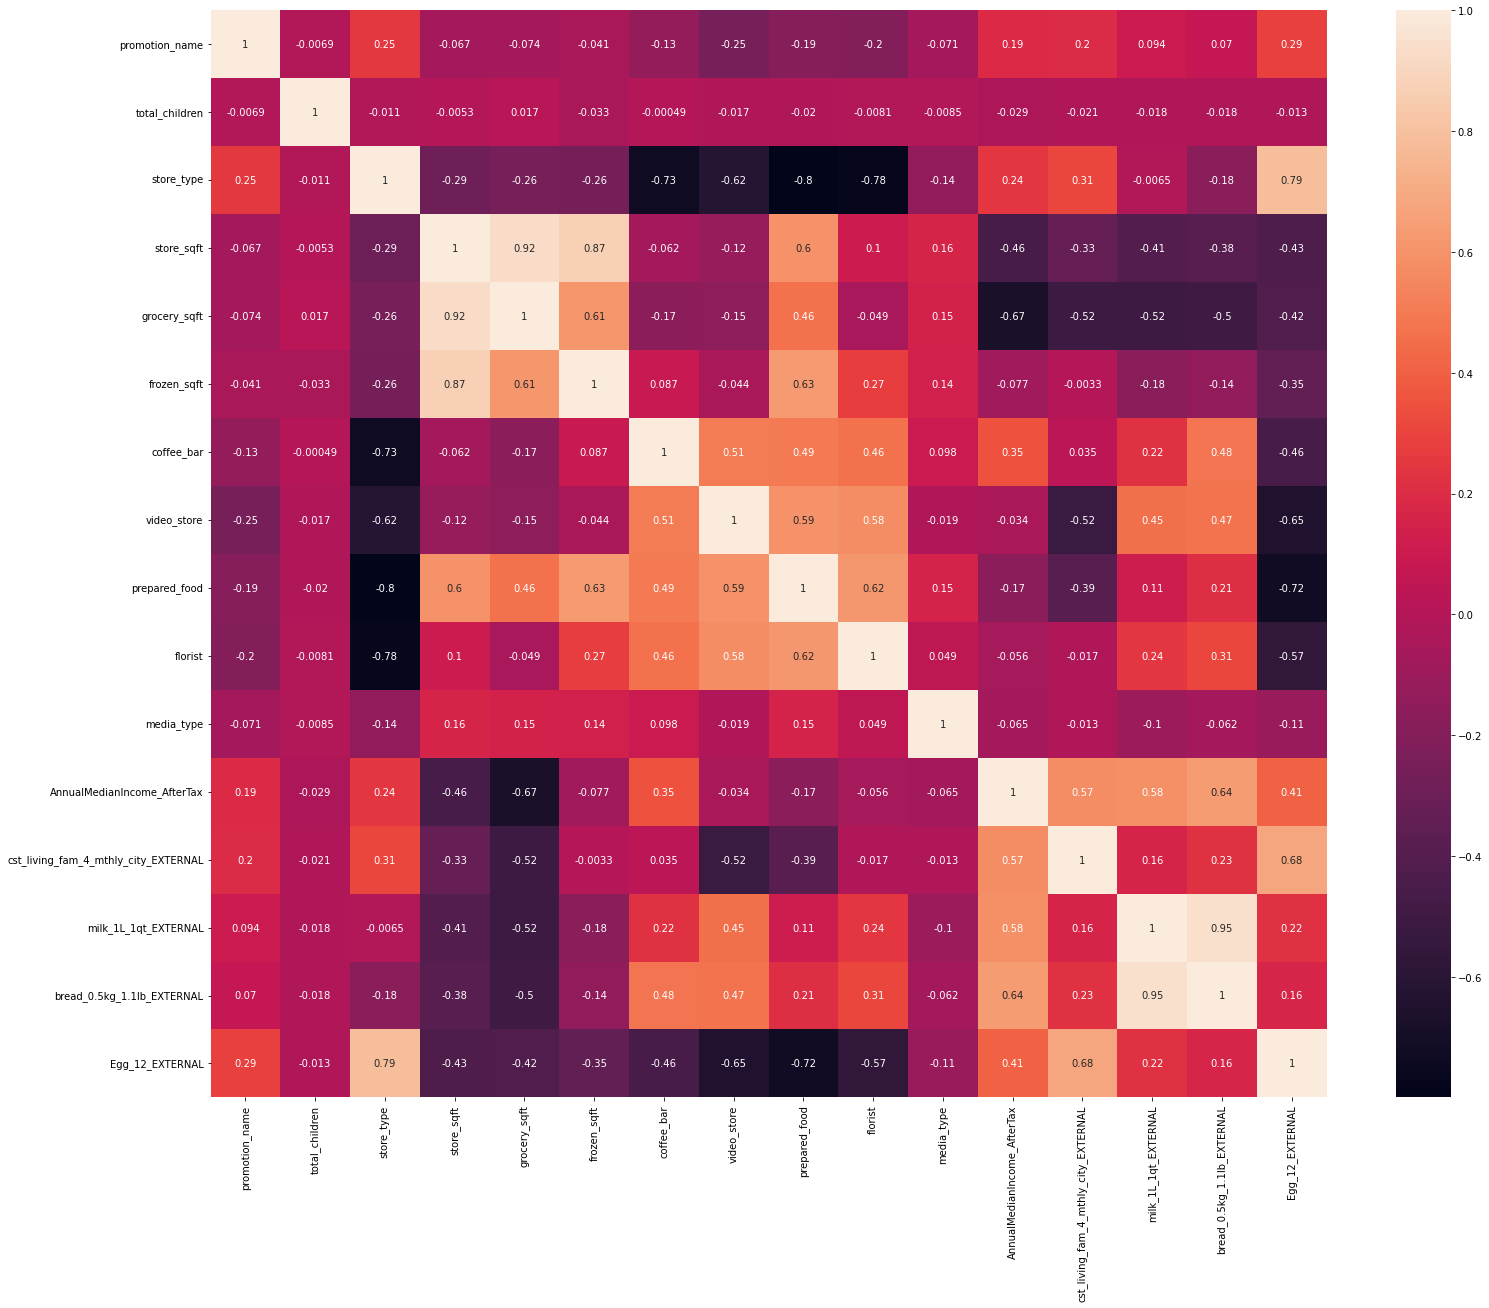

In [119]:
fig=plt.figure(figsize=(25,20))
sns.heatmap(x1.corr(),annot=True)
plt.show();

In [113]:
model_new = DecisionTreeRegressor()
model_new.fit(x1_train,y1_train)
y1_pred=model_new.predict(x1_test)
print('r2 score: ', r2_score(y1_test, y1_pred))

r2 score:  0.9972536050924364


In [114]:
model_newrf = RandomForestRegressor()
model_newrf.fit(x1_train, y1_train)


RandomForestRegressor()

In [130]:
y_pred_newrf= model_newrf.predict(x1_test)
print('r2 score: ', r2_score(y1_test, y_pred_newrf))



r2 score:  0.9972782564070618


In [116]:
print("Mean Absolute Error:", metrics.mean_absolute_error(y1_test, y_pred_newrf))
print("Mean Squared Error:", metrics.mean_squared_error(y1_test, y_pred_newrf))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y1_test, y_pred_newrf)))

Mean Absolute Error: 0.1322317488216237
Mean Squared Error: 2.518557161800817
Root Mean Squared Error: 1.5869962702542237


In [125]:
data3=data2.drop(columns=['coffee_bar', 'video_store',
       'prepared_food', 'florist',])

In [126]:
data3.head()

,promotion_name,total_children,store_type,store_sqft,grocery_sqft,frozen_sqft,media_type,cost,AnnualMedianIncome_AfterTax,cst_living_fam_4_mthly_city_EXTERNAL,milk_1L_1qt_EXTERNAL,bread_0.5kg_1.1lb_EXTERNAL,Egg_12_EXTERNAL
0,0,1.0,0,27694.0,18670.0,5415.0,3,126.62,40680,4545,0.8,2.54,1.7
1,6,0.0,0,27694.0,18670.0,5415.0,3,59.86,40680,4545,0.8,2.54,1.7
2,18,4.0,0,27694.0,18670.0,5415.0,3,84.16,40680,4545,0.8,2.54,1.7
3,6,2.0,0,27694.0,18670.0,5415.0,5,95.78,40680,4545,0.8,2.54,1.7
4,11,0.0,0,27694.0,18670.0,5415.0,7,50.79,40680,4545,0.8,2.54,1.7


In [127]:
x2=data3.drop('cost',axis=1)
y2=data3['cost']
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3)

In [128]:
data3.columns

Index(['promotion_name', 'total_children', 'store_type', 'store_sqft',
       'grocery_sqft', 'frozen_sqft', 'media_type', 'cost',
       'AnnualMedianIncome_AfterTax', 'cst_living_fam_4_mthly_city_EXTERNAL',
       'milk_1L_1qt_EXTERNAL', 'bread_0.5kg_1.1lb_EXTERNAL',
       'Egg_12_EXTERNAL'],
      dtype='object')

In [129]:
model_new1 = DecisionTreeRegressor()
model_new1.fit(x2_train,y2_train)
y2_pred=model_new1.predict(x2_test)
print('r2 score: ', r2_score(y2_test, y2_pred))

r2 score:  0.9978331188551605


In [131]:
model_newrf1 = RandomForestRegressor()
model_newrf1.fit(x2_train, y2_train)

RandomForestRegressor()

In [133]:
y2_pred_newrf= model_newrf1.predict(x2_test)
print('r2 score: ', r2_score(y2_test, y2_pred_newrf))

r2 score:  0.9978156156108031
